In [1]:
import numpy as np
import h5py
import time
import pandas as pd
import matplotlib.pyplot as plt
import glob
import scipy
import pickle as pkl
import matplotlib as mpl
from astropy.coordinates import SkyCoord
from astropy import units as u

n = 48

deep = pd.read_csv('/project/chihway/raulteixeira/data/deep_fields_nice_n_z.csv.gz')
wide = pd.read_csv('/project/chihway/raulteixeira/data/BPZ+SOM_mcal_gold_wide_48x48_ids+cells+fluxes.csv.gz')
Balrog_Term = np.load('/project/chihway/raulteixeira/data/BalrogTerm_v01_29072023.npy')

In [2]:
def flux2mag(flux):
    return -2.5 * np.log10(flux) + 30

bands = ['R', 'I', 'Z']
for band in bands:
    wide[f'MAG_{band}']=flux2mag(wide[f'FLUX_{band}'])

In [3]:
wide.columns

Index(['Unnamed: 0.2', 'Unnamed: 0', 'Unnamed: 0.1', 'COADD_OBJECT_ID',
       'FLUX_R', 'FLUX_ERR_R', 'FLUX_I', 'FLUX_ERR_I', 'FLUX_Z', 'FLUX_ERR_Z',
       'cells', 'CHI_SQ', 'ID', 'M_0', 'ODDS', 'T_B', 'T_ML', 'Z_B', 'Z_B_MAX',
       'Z_B_MIN', 'Z_MEAN', 'Z_ML', 'Z_SAMP', 'Z_SIG', 'MAG_R', 'MAG_I',
       'MAG_Z'],
      dtype='object')

In [4]:
n=48
cmap='magma'
fun = 'len'
feat = 'FLUX_I'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square_len_wide = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_len = square[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_len, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

NameError: name 'square' is not defined

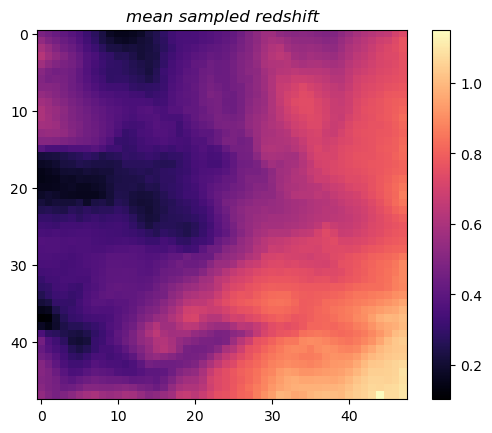

In [6]:
n=48
cmap='magma'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'mean sampled redshift'
square_mean_z_wide = wide[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im_z = square_mean_z_wide[(feat, fun)].values.reshape(n,n)
image = plt.imshow(im_z, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()

In [7]:
ids = np.argsort(im_z.flatten())

In [9]:
percentages = im_len.flatten()[ids].cumsum()/len(wide)

In [10]:
masks = []
for lim1, lim2 in zip([0, .25, .5, .75], [.25, .5, .75, 1.]):
    masks.append(ids[(lim1<percentages) & (percentages<=lim2)])

In [11]:
[len(mask) for mask in masks]

[746, 520, 483, 555]

In [12]:
sum_=0
for mask in masks:
    iv_ =im_len.flatten()[mask].sum()
    print(iv_)
    sum_+=iv_
print(sum_)

11367796
11383521
11383372
11379938
45514627


In [ ]:
square_len_wide.FLUX_I

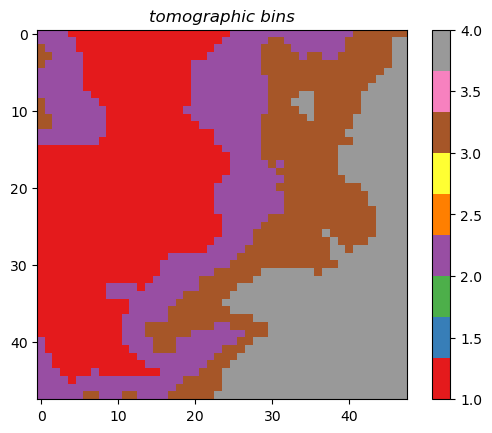

In [15]:
n=48
cmap='Set1'
fun = 'mean'
feat = 'Z_SAMP'
vmin,vmax=None,None#-1,3
norm=None
title = 'tomographic bins'
#square = df[[feat, 'cells']].groupby('cells').agg(['mean', 'median', 'std', len])
im = np.zeros(n**2)

for i, mask in enumerate(masks):
    im[mask] = (i+1)
    
im = im.reshape(n,n)

image = plt.imshow(im, cmap=cmap, vmin=vmin, vmax=vmax, norm=norm)
#divider = make_axes_locatable(axes[i,j])
#cax = divider.append_axes('right', size='5%', pad=0.05)
plt.colorbar(image, orientation='vertical') # cax=cax
plt.title(f'{title}',style='italic')
plt.show()